<a href="https://colab.research.google.com/github/gojeonpa2se/DS1002-S24-1/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of returns:
   spy_adj_close  aapl_adj_close
1      -0.007572       -0.009722
2       0.003815        0.007968
3      -0.002812       -0.004703
4       0.005330        0.016086
5       0.006781        0.021241
First five values of SPY returns: [-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]
First five values of AAPL returns: [-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]
Last five excess returns for SPY: [-0.00576237  0.0101411  -0.00872841  0.01288957  0.00911779]
Last five excess returns for AAPL: [ 0.00423088  0.00167981 -0.00468264  0.01647898  0.00680788]


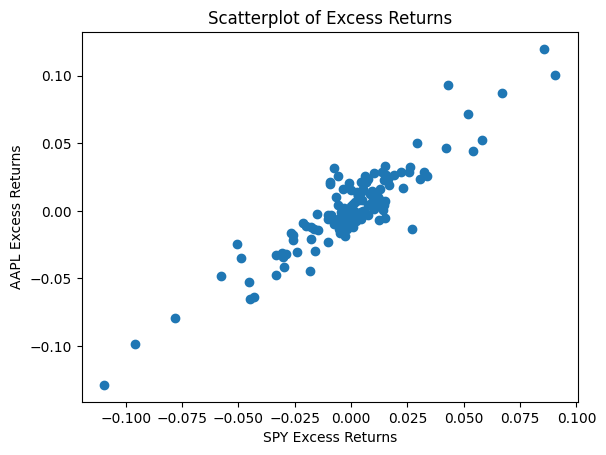

Beta estimate: 1.0956172644197222
First ten tuples of beta sensitivity results:
[(0, 0.7780271291138472), (1, 0.7779227611028062), (2, 0.7780186010891412), (3, 0.7784391413984395), (4, 0.7789941470436159), (5, 0.7778864515205234), (6, 0.7790012519236995), (7, 0.779119870445966), (8, 0.7782475196059937), (9, 0.7778763569006095)]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('./capm_market_data.csv')

# Drop the date column
data = data.drop(columns=['date'])

# Compute daily returns
returns = data.pct_change().dropna()

# Print the first 5 rows of returns
print("First 5 rows of returns:")
print(returns.head())

# Save SPY and AAPL returns into separate numpy arrays
SPY_returns = returns['spy_adj_close'].values
AAPL_returns = returns['aapl_adj_close'].values

# Print the first five values from each of the two arrays
print("First five values of SPY returns:", SPY_returns[:5])
print("First five values of AAPL returns:", AAPL_returns[:5])

# Compute excess returns
R_f = 0.0175 / 252
SPY_excess_returns = SPY_returns - R_f
AAPL_excess_returns = AAPL_returns - R_f

# Print the last five excess returns
print("Last five excess returns for SPY:", SPY_excess_returns[-5:])
print("Last five excess returns for AAPL:", AAPL_excess_returns[-5:])

# Make scatterplot
plt.scatter(SPY_excess_returns, AAPL_excess_returns)
plt.xlabel('SPY Excess Returns')
plt.ylabel('AAPL Excess Returns')
plt.title('Scatterplot of Excess Returns')
plt.show()

# Compute beta estimate
covariance = np.cov(SPY_excess_returns, AAPL_excess_returns)[0, 1]
variance = np.var(SPY_excess_returns)
beta_estimate = covariance / variance

print("Beta estimate:", beta_estimate)

# Beta sensitivity function
def beta_sensitivity(x, y):
    beta_list = []
    for i in range(len(x)):
        x_temp = np.delete(x, i).reshape(-1, 1)
        y_temp = np.delete(y, i)
        covariance_temp = np.cov(x_temp.flatten(), y_temp)[0, 1]
        variance_temp = np.var(x_temp.flatten())
        beta_temp = covariance_temp / variance_temp
        beta_list.append((i, beta_temp))
    return beta_list

# Compute beta sensitivity for SPY and AAPL
beta_sensitivity_results = beta_sensitivity(AAPL_excess_returns, SPY_excess_returns)
print("First ten tuples of beta sensitivity results:")
print(beta_sensitivity_results[:10])